[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb)

In [2]:
#%%imports
import glob
import matplotlib.pyplot as plt
import numpy as np
import polars as pl
import sys

sys.path.append("../")
from LStein import (
    utils as lvisu,
    makedata as md
)
from LStein.LSteinCanvas import LSteinCanvas

# plt.style.use("dark_background")

In [ ]:
#passbands
df_pb = pl.read_csv("../data/passband_specs.csv")
passbands = list(df_pb["name"])
pb_mappings = dict(zip(df_pb["wavelength"], df_pb.select(pl.exclude("wavelength")).to_numpy()))

In [6]:
#%%load some data
raw, pro = md.simulate(5, opt="sin")
df = pl.concat([pl.from_dict(raw), pl.from_dict(pro)])
for t in df["period"].unique(): pb_mappings[t] = [np.round(t, 3)]
legend = False
thetalab = "Period [s]"
xlab = "Time [s]"
ylab = "Amplitude []"

df_raw = df.filter(pl.col("processing")=="raw")
theta_raw = np.sort(np.unique(df_raw[:,0]))
df_raw_p = df_raw.partition_by(df_raw.columns[0], maintain_order=True)
x_raw = [df[:,1].to_numpy().astype(np.float64) for df in df_raw_p]
x_raw = [xi - np.nanmin(xi) for xi in x_raw]
y_raw = [df[:,2].to_numpy().astype(np.float64) for df in df_raw_p]

In [7]:
unique_thetas = np.unique(theta_raw)
thetaticks = np.round(np.linspace(np.floor(np.min(theta_raw)), np.ceil(np.max(theta_raw)), 4),0).astype(int)
xticks = np.round(np.linspace(np.floor(np.min(np.concat(x_raw))), np.ceil(np.max(np.concat(x_raw))), 4), decimals=0).astype(int)
yticks = np.round(np.linspace(np.floor(np.min(np.concat(y_raw))), np.ceil(np.max(np.concat(y_raw))), 4), decimals=0).astype(int)
# yticks = np.sort(np.append(yticks, [-10, 80]))
panelsize = np.pi/10
vmin = None
colors = lvisu.get_colors(theta_raw, cmap="nipy_spectral", vmin=vmin)


# Standard Usage

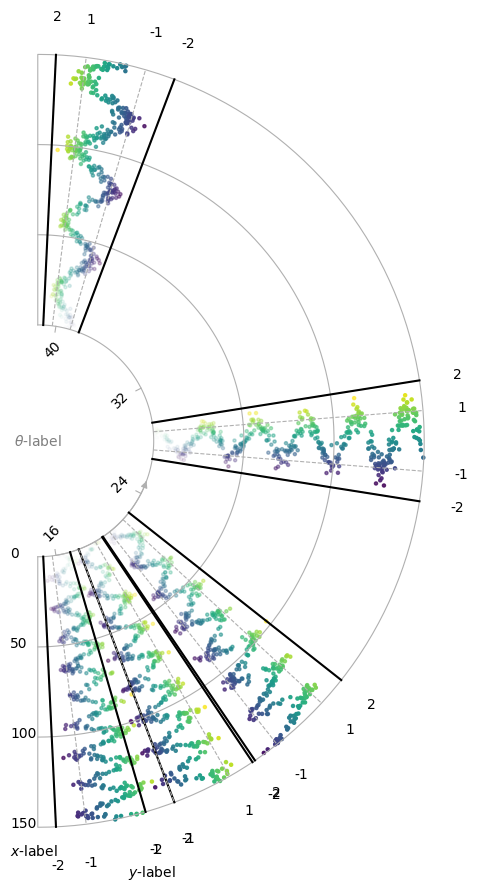

In [8]:
fig = plt.figure(figsize=(5,9))
ax = fig.add_subplot(111)

#init canvas (similar to `fig = plt.figure()`)
LSC = LSteinCanvas(ax,
    thetaticks,
    xticks=xticks,                          #use as ticks and labels
    # xticks=[-20,0,20,100],                  #custom (also use as labels)
    # xticks=(xticks,["x1","x2","x3","x4"]),  #custom labels
    yticks=yticks,
    thetaguidelims=(-np.pi/2,np.pi/2), thetaplotlims=(-np.pi/2+panelsize/2,np.pi/2-panelsize/2),
    xlimdeadzone=0.3,
    thetalabel=r"$\theta$-label", xlabel=r"$x$-label", ylabel=r"$y$-label",
    thetaarrowpos_th=25, ylabpos_th=np.min(theta_raw),
    thetatickkwargs=dict(ls="-"), thetaticklabelkwargs=dict(rotation=45), thetalabelkwargs=dict(c="tab:grey"),
    xtickkwargs=dict(ls="-"), xticklabelkwargs=dict(xytext=(-2,0)), xlabelkwargs=dict(c="k"),
)

#get colors for colormapping `theta`
colors = lvisu.get_colors(theta_raw)

#plot different panels
for i in range(len(theta_raw)):
    
    #add a panel (similar to `ax = fig.add_subplot()`)
    LSP = LSC.add_panel(
        theta=theta_raw[i],
        yticks=None,                                                #as initialized in `LSteinCanvas`
        # yticks=yticks,                                              #predifined (use also as labels)
        # yticks=[np.floor(y_raw[i].min()), np.ceil(y_raw[i].max())], #data fills the entire panel
        # yticks=(yticks, ["A", "B", "C", "D"]),                      #predifined (custom labels)
        panelsize=panelsize,
        show_panelbounds=True, show_yticks=True,
        y_projection_method="theta",                                #execute projection in theta-space (preferred)
        # y_projection_method="y",                                    #execute projection in y-space
        ytickkwargs=dict(ls="--"), yticklabelkwargs=None,
        panelboundskwargs=None,
    )

    #plotting into the panel (similar to `ax.plot()`) 
    LSP.scatter(x_raw[i], y_raw[i], c=y_raw[i], s=5,  alpha=np.linspace(0, 1, y_raw[i].shape[0]))
    # LSP.plot(x_raw[i], y_raw[i], c=y_raw[i], s=5,  alpha=np.linspace(0, 1, y_raw[i].shape[0]))

fig.tight_layout()
plt.show()

# Convenience Usage


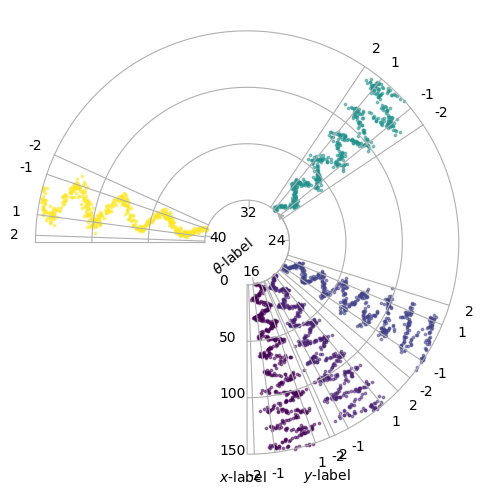

In [9]:
fig = plt.figure(figsize=(5,9))
ax = fig.add_subplot(111)

#init canvas (similar to `fig = plt.figure()`)
LSC = LSteinCanvas(ax,
    thetaticks, xticks, yticks,
    thetaguidelims=(-np.pi/2,2*np.pi/2), thetaplotlims=(-np.pi/2+panelsize/2,2*np.pi/2-panelsize/2),
    xlimdeadzone=0.2,
    thetalabel=r"$\theta$-label", xlabel=r"$x$-label", ylabel=r"$y$-label",
    thetaarrowpos_th=None, ylabpos_th=np.min(theta_raw),
    thetatickkwargs=None, thetaticklabelkwargs=dict(pad=0.3), thetalabelkwargs=dict(rotation=40, textcoords="offset fontsize", xytext=(-1,-1)),
    xtickkwargs=None, xticklabelkwargs=dict(xytext=(-2,0)), xlabelkwargs=None,
)

#plotting all the series (similar to `plt.plot()`)
LSC.scatter(theta_raw, x_raw, y_raw, panel_kwargs=dict(y_projection_method="theta"), sctr_kwargs=dict(s=3, alpha=0.5))

fig.tight_layout()
plt.show()
